# Advanced, Common, Features

The ATLAS data model's primary objects, like the `Jet` or `Electron` (or any others) have some features in common. This chapter talks about access an objet's decorations (and please let us know if there are others that should be described).

In [3]:
from config import ds_bphys as ds
import matplotlib.pyplot as plt
import awkward as ak
from func_adl_servicex_xaodr21 import cpp_float, cpp_string

## Object Decorations

The XAOD data model is designed to be extensible. Another object member can be added at anytime, even if the object doesn't have an accessor method. In fact, almost all data in the data model is stored as a named column: when you access `jet.pt()` the `pt` method actually does a lookup on a decorator with the name `pt` associated with the `jet` object.

This feature is used extensively in reconstruction and calibration processing. Since decorators can be almost any type of access, in `func_adl` you have to used parameterized access to get at them. Here is an example from a b-physics derived dataset. We'll demo this by translating a snippet of *b*-physics code provided by Peter Onyisi.

If you've not worked with derived BPHYS datasets, they are unique-ish in the ATLAS world. Since statistics are the name of the game, almost everything is stripped out. Here we want to go after the `QUAD_mass` decoration on the `BPHY4Quads` collection in the sample. First job is to figure out what the `BPHY4Quads` collection is. The ATLAS `checkxAOD.py` tool is very useful here. If you do that, you'll find the following:

```bash
[bash][atlas AnalysisBase-21.2.62]:data > checkxAOD.py DAOD_BPHY4.999031._000001.pool.root.1
======================================================================================================================== File: DAOD_BPHY4.999031._000001.pool.root.1
------------------------------------------------------------------------------------------------------------------------    Memory size        Disk Size       Size/Event  Compression Entries  Name (Type)
------------------------------------------------------------------------------------------------------------------------       333.24 kB         50.19 kB     0.00 kB/event    6.64     20788   TrigConfKeys (xAOD::TrigConfKeys_v1) [Trig]
      2544.13 kB        516.87 kB     0.02 kB/event    4.92     20788   GSFConversionVertices (DataVector<xAOD::Vertex_v1>) [egamma]
      4089.23 kB       1132.31 kB     0.05 kB/event    3.61     20788   LVL1MuonRoIs (DataVector<xAOD::MuonRoI_v1>) [Trig]
      6630.11 kB       1189.60 kB     0.06 kB/event    5.57     20788   InDetForwardTrackParticles (DataVector<xAOD::TrackParticle_v1>) [InDet]
     12605.41 kB       1757.67 kB     0.08 kB/event    7.17     20788   EventInfo (xAOD::EventInfo_v1) [EvtId]
      7545.86 kB       2787.27 kB     0.13 kB/event    2.71     20788   HLT_xAOD__MuonContainer_MuonEFInfo_FullScan (DataVector<xAOD::Muon_v1>) [Trig]
     23009.07 kB       2875.53 kB     0.14 kB/event    8.00     20788   McEventInfo (PileUpEventInfo_p5) [EvtId]
     14812.24 kB       3296.27 kB     0.16 kB/event    4.49     20788   HLT_xAOD__TrigBphysContainer_EFTrackMass (DataVector<xAOD::TrigBphys_v1>) [Trig]
     21498.52 kB       4903.93 kB     0.24 kB/event    4.38     20788   HLT_xAOD__MuonContainer_MuonEFInfo (DataVector<xAOD::Muon_v1>) [Trig]
     61415.48 kB       4976.95 kB     0.24 kB/event   12.34     20788   HLT_xAOD__TrigBphysContainer_EFBMuMuXFex (DataVector<xAOD::TrigBphys_v1>) [Trig]
    217772.43 kB       5590.42 kB     0.27 kB/event   38.95     20788   xTrigDecision (xAOD::TrigDecision_v1) [Trig]
    107825.61 kB       7299.25 kB     0.35 kB/event   14.77     20788   HLT_xAOD__TrigBphysContainer_EFMultiMuFex (DataVector<xAOD::TrigBphys_v1>) [Trig]
     26836.23 kB       8364.40 kB     0.40 kB/event    3.21     20788   Electrons (DataVector<xAOD::Electron_v1>) [egamma]
    104940.43 kB       8684.58 kB     0.42 kB/event   12.08     20788   HLT_xAOD__TrigBphysContainer_L2BMuMuFex (DataVector<xAOD::TrigBphys_v1>) [Trig]
     14616.80 kB       8693.32 kB     0.42 kB/event    1.68     20788   MuonSpectrometerTrackParticles (DataVector<xAOD::TrackParticle_v1>) [Muon]
     20589.57 kB      11065.87 kB     0.53 kB/event    1.86     20788   GSFTrackParticles (DataVector<xAOD::TrackParticle_v1>) [egamma]
     38546.04 kB      11397.73 kB     0.55 kB/event    3.38     20788   Photons (DataVector<xAOD::Photon_v1>) [egamma]
     23701.12 kB      13832.01 kB     0.67 kB/event    1.71     20788   HLT_xAOD__TrackParticleContainer_InDetTrigTrackingxAODCnv_Muon_IDTrig (DataVector<xAOD::TrackParticle_v1>) [Trig]
    453682.19 kB      22308.57 kB     1.07 kB/event   20.34     20788   HLT_xAOD__TrigBphysContainer_EFBMuMuFex (DataVector<xAOD::TrigBphys_v1>) [Trig]
    521885.12 kB      24422.69 kB     1.17 kB/event   21.37     20788   BPHY4RefittedPrimaryVertices (DataVector<xAOD::Vertex_v1>) [*Unknown*]
     71110.69 kB      28750.34 kB     1.38 kB/event    2.47     20788   ExtrapolatedMuonTrackParticles (DataVector<xAOD::TrackParticle_v1>) [Muon]
     72210.54 kB      31226.66 kB     1.50 kB/event    2.31     20788   CombinedMuonTrackParticles (DataVector<xAOD::TrackParticle_v1>) [Muon]
     66508.79 kB      35456.61 kB     1.71 kB/event    1.88     20788   egammaClusters (DataVector<xAOD::CaloCluster_v1>) [egamma]
    142288.23 kB      45957.38 kB     2.21 kB/event    3.10     20788   Muons (DataVector<xAOD::Muon_v1>) [Muon]
    322969.71 kB      56110.05 kB     2.70 kB/event    5.76     20788   PrimaryVertices (DataVector<xAOD::Vertex_v1>) [InDet]
     99516.93 kB      59326.76 kB     2.85 kB/event    1.68     20788   BPHY4Quads (DataVector<xAOD::Vertex_v1>) [*Unknown*]
    110682.30 kB      62286.51 kB     3.00 kB/event    1.78     20788   BPHY4Pairs (DataVector<xAOD::Vertex_v1>) [*Unknown*]
    421894.21 kB     117419.71 kB     5.65 kB/event    3.59     20788   InDetTrackParticles (DataVector<xAOD::TrackParticle_v1>) [InDet]
   1064386.64 kB     292559.83 kB    14.07 kB/event    3.64     20788   TrigNavigation (xAOD::TrigNavigation_v1) [Trig]
------------------------------------------------------------------------------------------------------------------------   4056446.90 kB     874239.27 kB    42.05 kB/event                     Total
```

So we know we can access it as a vertex!

In [4]:
quad_mass = (
    ds.Select(lambda e: e.Vertices('BPHY4Quads'))
    .Select(lambda quads: {
        'mass': [q.auxdataConst[cpp_float]('QUAD_mass') for q in quads],
        'chi2': [q.chiSquared() for q in quads],
        'charge_code': [q.auxdataConst[cpp_string]('ChargeCode') for q in quads],
    })
    .AsAwkwardArray()
    .value()
)

And a two panel plot showing the difference in mass and fit $\chi^2$ for the two types of reconstructed vertices:

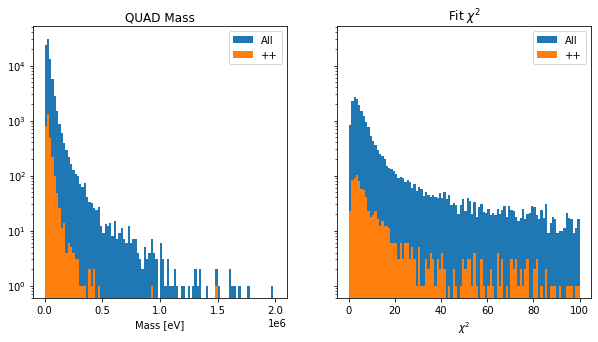

In [5]:
fig, [ax1, ax2] = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

two_plus_charges = ak.sum(ak.without_parameters(quad_mass.charge_code) == ord('+'), axis=1) == 2

ax1.hist(ak.flatten(quad_mass['mass']), bins=100, range=(0, 2e6), label='All')
ax1.hist(ak.flatten(quad_mass[two_plus_charges]['mass']), bins=100, range=(0, 2e6), label='++')
ax1.set_yscale('log')
ax1.set_xlabel('Mass [eV]')
ax1.legend()
ax1.set_title('QUAD Mass')

ax2.hist(ak.flatten(quad_mass['chi2']), bins=100, range=(0,100), label='All')
ax2.hist(ak.flatten(quad_mass[two_plus_charges]['chi2']), bins=100, range=(0, 100), label='++')
ax2.set_xlabel('$\chi^2$')
ax2.legend()
_ = ax2.set_title('Fit $\chi^2$')